# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

Using link below, obtain data to be used in the analysis.  We chose to use Louisiana crime data.

In [1]:
!wget https://data.brla.gov/api/views/fabb-cnnu/rows.csv

--2016-11-09 00:59:03--  https://data.brla.gov/api/views/fabb-cnnu/rows.csv
Resolving data.brla.gov (data.brla.gov)... 52.206.140.199
Connecting to data.brla.gov (data.brla.gov)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59876288 (57M) [text/csv]
Saving to: ‘rows.csv’

rows.csv            100%[=====================>]  57.10M  74.3MB/s   in 0.8s   

Last-modified header invalid -- time-stamp ignored.
2016-11-09 00:59:04 (74.3 MB/s) - ‘rows.csv’ saved [59876288/59876288]



The row count for the dataset is printed below using csvstat.  Note that this dataset is larger than the 250,000 limit, but it is limited to about 30,000 rows later in the analysis.  Also, the link to this data is updated daily, so please keep this in mind when reviewing the analysis portion, as the values referenced in the markdown cells may be slightly different than the updated data values.

In [2]:
!csvstat --count rows.csv

Row count: 301170


The column names in the dataset are listed below.  There are 20 columns in the dataset.

In [3]:
!csvcut -n rows.csv

  1: FILE NUMBER
  2: OFFENSE DATE
  3: OFFENSE TIME
  4: CRIME
  5: COMMITTED
  6: OFFENSE
  7: OFFENSE DESC
  8: ADDRESS
  9: ST NUMBER
 10: ST DIR
 11: ST NAME
 12: ST TYPE
 13: CITY
 14: STATE
 15: ZIP
 16: DISTRICT
 17: ZONE
 18: SUBZONE
 19: COMPLETE DISTRICT
 20: GEOLOCATION


Below, the general descriptive statistics are generated for each of the attributes in the dataset.  Please note that csvstat may take several minutes to run. It takes, on average, 1 minute and 9 seconds.

Given that there are more than 300,000 rows in the csv file, the csvstat command may not work in datanotebook.org.

In [95]:
!time csvstat rows.csv

  1. FILE NUMBER
	<type 'int'>
	Nulls: True
	Min: 1000000543
	Max: 2500032927
	Sum: 392947027158401
	Mean: 1323967813.33
	Median: 1300071591
	Standard Deviation: 169642938.108
	Unique values: 201518
	5 most frequent values:
		1200126218:	76
		1400082626:	26
		1600070022:	25
		1300051176:	24
		1600090456:	22
  2. OFFENSE DATE
	<type 'datetime.date'>
	Nulls: False
	Min: 2011-01-01
	Max: 2016-11-06
	Unique values: 2137
	5 most frequent values:
		2011-03-25:	287
		2011-04-06:	267
		2011-07-01:	261
		2011-04-29:	256
		2011-05-06:	254
  3. OFFENSE TIME
	<type 'unicode'>
	Nulls: True
	Unique values: 1449
	5 most frequent values:
		1200:	5351
		0000:	4941
		2200:	4845
		1700:	4755
		2100:	4362
	Max length: 4
  4. CRIME
	<type 'unicode'>
	Nulls: False
	Unique values: 17
	5 most frequent values:
		OTHER:	89577
		THEFT:	58482
		NARCOTICS:	28038
		BATTERY:	27640
		CRIMINAL DAMAGE TO PROPERTY:	22844
	Max length: 27
  5. COMMITTED
	<type 'unicode'>
	Nulls: False
	Values: ATTEMPTED, COMMITTED
  6. OF

The dataset is composed of crimes reported in Baton Rouge and handled by the Baton Rouge Police Department. Crimes include Burglaries (Vehicle, Residential and Non-residential), Robberies (Individual and Business), Theft, Narcotics, Vice Crimes, Assault, Nuisance, Battery, Firearm, Homicides, Criminal Damage to Property, Sexual Assaults and Juvenile. This crime incident data set includes crime data dating back to January 2011 and the data is updated daily.

This is the link to the crimes data for Baton Rouge, LA: http://us-city.census.okfn.org/entry/batonrouge/crime-stats

| Field Name | Description|
| -----------|------------|
|FILE NUMBER|Police Report Number|
|OFFENSE DATE|Crime date|
|OFFENSE TIME|Crime time|
|CRIME|Crime type general category|
|COMMITTED|Indicates if the crime was attempted or committed|
|OFFENSE|Louisiana Revised Statues (LRS) code of the crime|
|OFFENSE DESC|Description of the crime|
|ADDRESS|Formatted crime street address|
|ST NUMBER|Street number where the crime occurred|
|ST DIR|Street direction where the crime occurred|
|ST NAME|Street name where the crime occurred|
|ST TYPE|Street type where the crime occurred|
|CITY|City where the crime occurred|
|STATE|State where the crime occurred|
|ZIP|Zip code where the crime occurred|
|DISTRICT|Police geographical District number where the crime occurred|
|ZONE|Police geographical Zone within a District where the crime occurred|
|SUBZONE|Police geographical Subzone number within a Zone where the crime occurred|
|COMPLETE DISTRICT|Shows concatenated District, Zone and Subzone|
|GEOLOCATION|Full crime street address for geocoding|

Based off of the information shown above, the following columns had null values:
1. File Number
2. Offense Time
3. Address
4. Street Number
5. Street Direction
6. Street Name
7. Street Type
8. City
9. State
10. Zip
11. District
12. Zone
13. Subzone
14. Complete District
15. Geolocation

It is concerning that 15 out of the 20 columns in the dataset have null values, especially fields which could act as identifiers, such as file number.  As seen in the results of the csvstat results above, all of the columns contain repeated values, since the unique values in each of the columns is not equal to the total row count.  This could create some issues when creating the star schema.  Additionally, some of the information in the columns is messy and may be innaccurate.  For example, in referencing the csvstat output for geolocation, the four most frequent locations shown are actually 2 locations with and without the corresponding zip code.  This resulted in slightly different longitude and latitude coordinates.  After googling these locations in Louisiana, the first most common geolocation is actually the Baton Rouge police station.  It seems unlikely that this many crimes would be committed at a police station as the column definition in the metadata suggests, so we will keep this in mind in our analysis.  Also, the geolocation may not be the greatest attribute to use because of the differences for addresses with zip codes versus not.  We take steps to limit the null values in the dataset used for analysis.

The columns that interested us the most are time and description fields such as offense date, crime, offense description, and complete district. Since this data set only looks at crimes that occurred in Baton Rouge, the city and state fields do not provide any additional information. However, the zip, district, zone may provide more detailed information such as if certain zip codes or zones had more crimes than others.

A few of the questions to explore are listed below:
1. Did the crimes increase each year?
2. Which crime types occurred the most in Baton Rouge, LA?
3. Did certain zones have more crimes than other zones?


To get a better grasp of the dimensions of the dataset and the nature of the transactions, we filtered the column with the most unique levels in the dataset, and then filtered to a duplicated value in this column.  File number has the most unique values as per the csvstat output, so we use this column to filter by.  File number '1400082626' has 26 instances in the table, so the output below shows the rows in the dataset corresponding to this particular file number.  It seems that each file number can have multiple date time combinations, multiple crimes, and multiple Offense Statutes associated with that particular crime.  In filtering by the most frequent values, it seems that for the overall dataset, these file numbers rarely have address information.  This could suggest some erroneous file number information for those cases which do not have address information, which will be important to consider in our analysis going forward.  Again, when we limit the dataset, we will avoid cases of null address information, and also account for the fact that the data does not have a primary key.

In [4]:
!cat rows.csv | csvcut -c1,2,3,4,5,6,7 | csvgrep -c1 -m "1400082626" |csvlook
!cat rows.csv | csvcut -c8,9,10,11,12,13,14,15,16,17,18,19,20 | csvgrep -c1 -m "1400082626" |csvlook
#!cat rows.csv | csvcut -c1,2,3,4,5,6,7 | csvgrep -c1 -m "1200126218" |csvlook
#!cat rows.csv | csvcut -c8,9,10,11,12,13,14,15,16,17,18,19,20 | csvgrep -c1 -m "1200126218" |csvlook

|--------------+--------------+--------------+-----------+-----------+-------------+---------------------------------|
|  FILE NUMBER | OFFENSE DATE | OFFENSE TIME | CRIME     | COMMITTED | OFFENSE     | OFFENSE DESC                    |
|--------------+--------------+--------------+-----------+-----------+-------------+---------------------------------|
|  1400082626  | 05/18/2015   | 0910         | NARCOTICS | COMMITTED | 40:971      | POSS/DIST MANF COUNTERFEIT DRG  |
|  1400082626  | 03/20/2016   | 1211         | NARCOTICS | COMMITTED | 40:979      | ATT OR CONSPIRACY:DRUGS         |
|  1400082626  | 05/18/2015   | 0910         | NARCOTICS | COMMITTED | 40:967A     | DIST/MANF SCH 2 DRUG            |
|  1400082626  | 05/18/2015   | 0910         | NARCOTICS | COMMITTED | 40:970A     | DIST/MANF SCH 5 DRUG            |
|  1400082626  | 12/02/2015   | 2303         | NARCOTICS | COMMITTED | 40:967      | POSS/DIST MANUF SCHED II        |
|  1400082626  | 03/20/2016   | 1211         | N

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [2]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


*Note*: To use PostgreSQL on datanotebook.org, please uncomment the lines with username of `dbuser,` and also uncomment and run the commented out command below.

The following commands drops the database 'project2' if it exists, then creates the database 'project2'.

In [3]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [4]:
#!dropdb -U euhwang --if-exists project2
!dropdb -U dbuser --if-exists project2

NOTICE:  database "project2" does not exist, skipping


In [5]:
#!createdb -U euhwang project2
!createdb -U dbuser project2

In [6]:
#%sql postgresql://euhwang@localhost:5432/project2
%sql postgresql://dbuser@localhost:5432/project2

'Connected: dbuser@project2'

### Create table and import

Looking at a sample of the data, we can determine the domain and range for each attribute. 

Based on the values shown in the csvstat output, we can identify the data type and max length and create the following with the following:

In [7]:
%%sql
DROP TABLE IF EXISTS BRcrime;
CREATE TABLE BRcrime 
(
    FILE_NUMBER CHAR(10),
    OFFENSE_DATE TIMESTAMP,
    OFFENSE_TIME VARCHAR(4),
    CRIME VARCHAR(27),
    COMMITTED VARCHAR(9),
    OFFENSE VARCHAR(15),
    OFFENSE_DESC VARCHAR(52),
    ADDRESS VARCHAR(37),
    ST_NUMBER INTEGER,
    ST_DIR CHAR(4),
    ST_NAME VARCHAR(28),
    ST_TYPE CHAR(4),
    CITY VARCHAR(11),
    STATE CHAR(4),
    ZIP CHAR(9),
    DISTRICT CHAR(1),
    ZONE CHAR(5),
    SUBZONE CHAR(5),
    COMPLETE_DISTRICT CHAR(5),
    GEOLOCATION VARCHAR(81)
)

Done.
Done.


[]

Now we'll load the data in more simply.  Note that this **requires** the use of an absolute path, so adjust it to your location:

In [8]:
!pwd

/home/jovyan/work


In [9]:
#%%sql
#COPY BRcrime FROM '/Users/euhwang/Dropbox/ISTM_6212/Project_2/rows.csv'
#CSV
#HEADER
#QUOTE '"'
#DELIMITER ',';

In [10]:
%%sql
COPY BRcrime FROM '/home/jovyan/work/rows.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

301344 rows affected.


[]

In [11]:
%%sql
SELECT count(*) FROM BRcrime;

1 rows affected.


count
301344


The following statement uses the INFORMATION_SCHEMA metadata database to extract a schema from a pgsql instance. This provides a quick overview of the column name, data type, max character length and if there are nullable fields. This allows us to understand the table structure, which will help us with my analysis going forward.

In [12]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'brcrime';

20 rows affected.


column_name,data_type,character_maximum_length,is_nullable
file_number,character,10,YES
offense_date,timestamp without time zone,None,YES
offense_time,character varying,4,YES
crime,character varying,27,YES
committed,character varying,9,YES
offense,character varying,15,YES
offense_desc,character varying,52,YES
address,character varying,37,YES
st_number,integer,None,YES
st_dir,character,4,YES


Creating additional columns such as year, month, and day will increase efficiency of analysis, and is best practice in creating a star schema. Now, an analyst working with the data will be able to query these calculated fields directly instead of having to type in "TO_CHAR(offense_date, 'YYYY')" every time he or she wants to search/filter by one of these date breakouts.

In [13]:
%%sql
SELECT TO_CHAR(offense_date, 'YYYY-MM-DD') AS offense_day_of_year, 
    TO_CHAR(offense_date, 'YYYY') AS offense_year,
    TO_CHAR(offense_date, 'MM') AS offense_month,
    TO_CHAR(offense_date, 'DD') AS offense_day,
    TO_CHAR(offense_date, 'Day') AS offense_day_of_week_str,
    TO_CHAR(offense_date, 'D') AS offense_day_of_week,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS offense_is_weekend,
    CASE WHEN CAST(TO_CHAR(offense_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS offense_is_weekday,
    TO_CHAR(offense_date, 'HH24') AS offense_hour_24,
    TO_CHAR(offense_date, 'Q') AS offense_quarter
FROM BRcrime
LIMIT 10
;

10 rows affected.


offense_day_of_year,offense_year,offense_month,offense_day,offense_day_of_week_str,offense_day_of_week,offense_is_weekend,offense_is_weekday,offense_hour_24,offense_quarter
2014-02-14,2014,02,14,Friday,6,1,0,00,1
2016-04-03,2016,04,03,Sunday,1,0,1,00,2
2016-02-01,2016,02,01,Monday,2,0,1,00,1
2016-03-16,2016,03,16,Wednesday,4,0,1,00,1
2016-04-01,2016,04,01,Friday,6,1,0,00,2
2016-03-30,2016,03,30,Wednesday,4,0,1,00,1
2016-03-28,2016,03,28,Monday,2,0,1,00,1
2016-04-02,2016,04,02,Saturday,7,1,0,00,2
2016-04-03,2016,04,03,Sunday,1,0,1,00,2
2016-03-28,2016,03,28,Monday,2,0,1,00,1


In [14]:
%%sql
ALTER TABLE BRcrime
ADD COLUMN offense_day_of_year char(10),
ADD COLUMN offense_year INTEGER,
ADD COLUMN offense_month INTEGER,
ADD COLUMN offense_day INTEGER,
ADD COLUMN offense_day_of_week_str char(9)
;

Done.


[]

In [15]:
%%sql
UPDATE BRcrime SET (offense_day_of_year, offense_year, offense_month, offense_day, offense_day_of_week_str) = 
(   TO_CHAR(offense_date, 'YYYY-MM-DD'), 
    CAST(TO_CHAR(offense_date, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(offense_date, 'MM') AS INTEGER),
    CAST(TO_CHAR(offense_date, 'DD') AS INTEGER),
    TO_CHAR(offense_date, 'Day')
 )
;

301344 rows affected.


[]

In [16]:
%%sql
SELECT offense_date,
       offense_day_of_year, 
       offense_year, 
       offense_month, 
       offense_day,
       offense_day_of_week_str
FROM BRcrime
LIMIT 10
;

10 rows affected.


offense_date,offense_day_of_year,offense_year,offense_month,offense_day,offense_day_of_week_str
2015-07-28 00:00:00,2015-07-28,2015,7,28,Tuesday
2012-10-19 00:00:00,2012-10-19,2012,10,19,Friday
2013-07-29 00:00:00,2013-07-29,2013,7,29,Monday
2011-02-03 00:00:00,2011-02-03,2011,2,3,Thursday
2014-03-18 00:00:00,2014-03-18,2014,3,18,Tuesday
2011-07-29 00:00:00,2011-07-29,2011,7,29,Friday
2011-05-12 00:00:00,2011-05-12,2011,5,12,Thursday
2015-03-03 00:00:00,2015-03-03,2015,3,3,Tuesday
2013-07-29 00:00:00,2013-07-29,2013,7,29,Monday
2015-07-19 00:00:00,2015-07-19,2015,7,19,Sunday


In our analysis, we decided to define crimes as the count of rows rather than distinct file numbers or offenses.  This is because there are typically multiple offenses and multiple occurences of these offenses for each police report (file number), so we feel as if counting the total number of rows for each file number would capture all instances of crime associated with each report.  That being said, the following query counts the number of crimes for each year in the dataset.  It indicates that crime has steadily gone down over the years from 62,552 crimes occurring to 2011 to 37,142\* crimes occuring in 2016. This is a 41% reduction in crimes in five years. However, since it is only November, the number of crimes can still increase. 

\*Please note that this figure may increase in the output below as a result of daily updates of the dataset.

In [17]:
%%sql
SELECT offense_year as Offense_Year, count(*) as Number_of_Crimes
FROM BRcrime
GROUP BY offense_year
ORDER BY offense_year ASC
;

6 rows affected.


offense_year,number_of_crimes
2011,62552
2012,55880
2013,50605
2014,47130
2015,47862
2016,37315


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Count of crimes occurring in Baton Rouge Over The Years


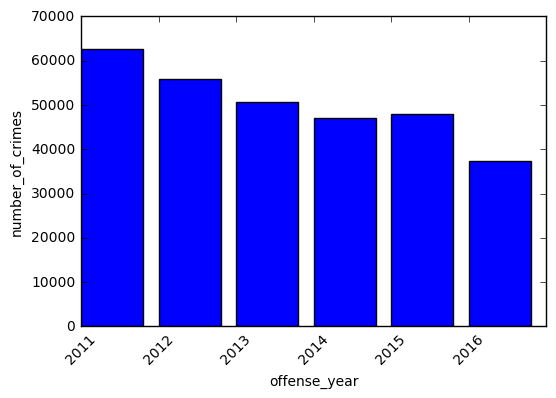

In [18]:
%matplotlib inline
result = _
result.bar()
!echo 'Count of crimes occurring in Baton Rouge Over The Years'

In order to limit the dataset and obtain reliable results from our analysis, we decided to only focused on crimes that occurred in 2016 that had non-null file numbers. The code below limits the data to 2016 only, and adds a new field called "file_number_evnt."  From our previous analysis, we know that there are cases of multiple file numbers, so this code create a file_number_evnt field which numbers instances (row number) for each file number by offense date, offense time and offense.  "Partition by" is similar to a group by statement and will just separate data into chunks and number rows according to each file number.

In [19]:
%%sql
DROP TABLE IF EXISTS BRcrime_2016;
CREATE TABLE BRcrime_2016 AS 
SELECT 
    *,
    row_number() OVER (PARTITION BY file_number order by offense_date, offense_time, offense) as file_number_evnt
  FROM BRcrime 
  WHERE offense_year = '2016'
    AND file_number is not null
;


Done.
36715 rows affected.


[]

The following code imputes values for null cells.  It is important to avoid null values and handle them accordingly when creating a usable data warehouse.  Please note that integer nulls are imputed as -999 and categorical nulls are imputed as "Null."  From the output, it is shown that Complete District, Street Number, Street Name, and Zip have null values for the 2016 dataset.

In [20]:
%%sql
UPDATE BRcrime_2016 SET complete_district = 'Null' where complete_district is null;
UPDATE BRcrime_2016 SET address = 'Null' where address is null;
UPDATE BRcrime_2016 SET st_number = -999 where st_number is null;
UPDATE BRcrime_2016 SET st_dir = 'Null' where st_dir is null;
UPDATE BRcrime_2016 SET st_name = 'Null' where st_name is null;
UPDATE BRcrime_2016 SET st_type = 'Null' where st_type is null;
UPDATE BRcrime_2016 SET city = 'Null' where city is null;
UPDATE BRcrime_2016 SET state = 'Null' where state is null;
UPDATE BRcrime_2016 SET zip = 'Null' where zip is null;
UPDATE BRcrime_2016 SET geolocation = 'Null' where geolocation is null;

2157 rows affected.
0 rows affected.
9 rows affected.
30603 rows affected.
0 rows affected.
1069 rows affected.
0 rows affected.
0 rows affected.
17019 rows affected.
0 rows affected.


[]

In [21]:
%%sql 
SELECT *
FROM BRcrime_2016 
LIMIT 5
;

5 rows affected.


file_number,offense_date,offense_time,crime,committed,offense,offense_desc,address,st_number,st_dir,st_name,st_type,city,state,zip,district,zone,subzone,complete_district,geolocation,offense_day_of_year,offense_year,offense_month,offense_day,offense_day_of_week_str,file_number_evnt
1300098655,2016-02-16 00:00:00,2354,FIREARM,COMMITTED,14:69.1,ILL POSS OF STOLEN FIREARMS,600 S 17TH ST,600,S,17TH,ST,BATON ROUGE,LA,70808,2,A,2,2A2,"600 S 17TH STBATON ROUGE, LA 70808(30.441815, -91.171103)",2016-02-16,2016,2,16,Tuesday,1
1400062150,2016-02-07 00:00:00,2230,THEFT,COMMITTED,13:69,ILL POSS STLN THINGS/CC,1900 N FOSTER DR,1900,N,FOSTER,DR,BATON ROUGE,LA,70805,1,C,2,1C2,"1900 N FOSTER DRBATON ROUGE, LA 70805(30.466118, -91.13971)",2016-02-07,2016,2,7,Sunday,1
1500026491,2016-03-27 00:00:00,1500,OTHER,ATTEMPTED,14:27,ATTEMPTED (Code Modifier),1526 N FOSTER DR,1526,N,FOSTER,DR,BATON ROUGE,LA,70805,1,C,2,1C2,"1526 N FOSTER DRBATON ROUGE, LA 70805(30.462631, -91.139536)",2016-03-27,2016,3,27,Sunday,1
1500030367,2016-04-20 00:00:00,1400,THEFT,COMMITTED,14:72.2,MONETARY INSTRUMENT ABUSE,11544 N HARRELL'S FERRY RD,11544,N,HARRELL'S FERRY,RD,BATON ROUGE,LA,70816,3,E,5,3E5,"11544 N HARRELL'S FERRY RDBATON ROUGE, LA 70816(30.432389, -91.053344)",2016-04-20,2016,4,20,Wednesday,1
1500072696,2016-04-14 00:00:00,1059,BATTERY,COMMITTED,14:35.3,DOMESTIC ABUSE BATT,1882 N PAMELA DR,1882,N,PAMELA,DR,BATON ROUGE,LA,70815,3,D,2,3D2,"1882 N PAMELA DRBATON ROUGE, LA 70815(30.465466, -91.050746)",2016-04-14,2016,4,14,Thursday,1


In order to re-investigate the nature of the dimensions in our dataset, the following code is used to check dataset to find duplicate file numbers. It creates a table to count the number of rows for each file number, and the second table counts the instances when there is more than one row for a particular file number.  The output from this step shows that there are about 7,000\* duplicated file numbers in our set for 2016, and that there are 24,177\* unique values for this field. <br> <br> \*Note that these values may increase with the daily dataset updates

In [22]:
%%sql 
DROP TABLE IF EXISTS count_dups;
CREATE TEMP TABLE count_dups AS SELECT
    file_number, 
    COUNT(*) AS counter
FROM BRcrime_2016 
GROUP BY 1
;

SELECT 
    COUNT(*) 
FROM count_dups
WHERE counter > 1;

Done.
24387 rows affected.
1 rows affected.


count
7175


In [23]:
%%sql 
DROP TABLE IF EXISTS count_dups;
CREATE TEMP TABLE count_dups AS SELECT
    file_number, 
    COUNT(*) AS counter
FROM BRcrime_2016 
GROUP BY 1
;

SELECT 
    *
FROM count_dups
WHERE counter > 1
LIMIT 10;

Done.
24387 rows affected.
10 rows affected.


file_number,counter
1600067040,2
1600042281,5
1600026580,3
1600103911,2
1600034713,2
1600097111,3
1600005840,3
1600048091,3
1600040290,3
1600106417,3


As seen in the output below, the file_number_evnt field created accounts for these duplicated rows.

In [24]:
%%sql
SELECT *
FROM BRcrime_2016
WHERE file_number = '1600026580'
order by file_number_evnt
;

3 rows affected.


file_number,offense_date,offense_time,crime,committed,offense,offense_desc,address,st_number,st_dir,st_name,st_type,city,state,zip,district,zone,subzone,complete_district,geolocation,offense_day_of_year,offense_year,offense_month,offense_day,offense_day_of_week_str,file_number_evnt
1600026580,2016-03-16 00:00:00,1735,FIREARM,COMMITTED,14:94,ILL USE OF A WEAPON,1900 68TH AV,1900,Null,68TH,AV,BATON ROUGE,LA,Null,4,C,1,4C1,"1900 68TH AVBATON ROUGE, LA(30.511505, -91.172859)",2016-03-16,2016,3,16,Wednesday,1
1600026580,2016-03-16 00:00:00,1800,OTHER,COMMITTED,13:108,RESISTING AN OFFICER/CC,1900 68TH AV,1900,Null,68TH,AV,BATON ROUGE,LA,Null,4,C,1,4C1,"1900 68TH AVBATON ROUGE, LA(30.511505, -91.172859)",2016-03-16,2016,3,16,Wednesday,2
1600026580,2016-03-16 00:00:00,1800,OTHER,COMMITTED,C.CR.P. ART 575,FUGITIVE,1900 68TH AV,1900,Null,68TH,AV,BATON ROUGE,LA,70807,4,C,1,4C1,"1900 68TH AVBATON ROUGE, LA 70807(30.511505, -91.172859)",2016-03-16,2016,3,16,Wednesday,3


## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

Please note that to view the Star Schema image **requires** the use of an absolute path, so please adjust the PATH to your location:

In [22]:
!pwd

/home/jovyan/work


In [23]:
from IPython.display import Image
PATH = "/Users/euhwang/Dropbox/ISTM_6212/Project_2/"

The design of the star schema created is shown below.  Since there was no primary key in the dataset and no obvious field to sum on, we had to make some adjustments.  It was determined that our data varied by File Number, File Number Event, Offense, Offense Date, Location and Zone.  Therefore, we created dimension tables for each of those and created keys associated with each.  We had to separate these fields since the combination of any of these tables would not be 1:1.  We decided to also separate out the crime dimension table which contains crime and another calculated field called crime type.  This field distinguishes whether the crime was a personal crime, property crime, black market crime, or other minor crime.  This field, plus the Committed/Attempted indicator are converted into binary fields and used as facts in the fact table. We separated out the other dimensions (crime, location, district, date time, and offense) because the affinity was natural. For the offense dimension, we found all the distinct offense and loaded into the offense dimension so that it can be easily joined to the fact table. For the future, we could add a last update timestamp and last update user in each of these dimension and fact tables to allow us to track if a new type of offense was added.

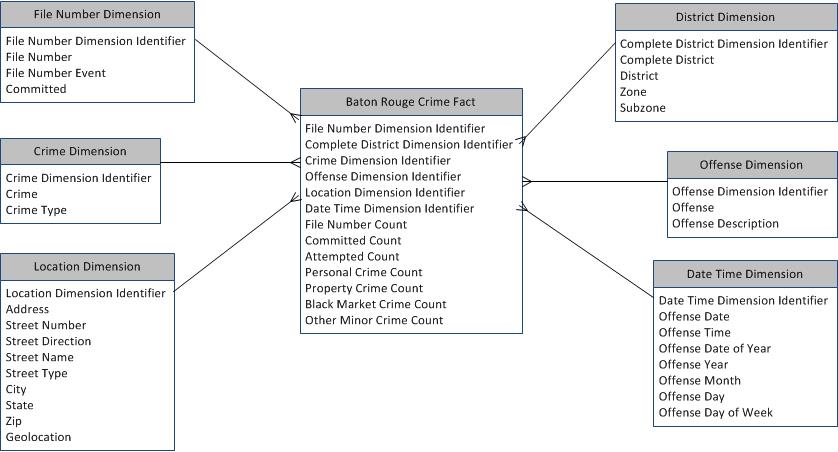

In [2]:
Image(filename = PATH + "BRcrimeStarSchema.jpg", width=1000, height=1000)

#### The following statements create the Crime Dimension table. 

First create a shell table with character and integer types.  Create a CRIME_DIM_ID, which uses SERIAL to create the numbering for the primary key.

In [25]:
%%sql
DROP TABLE IF EXISTS crime_dim;
CREATE TABLE crime_dim (
  crime_dim_id SERIAL PRIMARY KEY,
  crime varchar(27) DEFAULT NULL,
  crime_type VARCHAR(12) DEFAULT NULL  
);

Done.
Done.


[]

Next, insert distinct crime information from the original dataset.

In [26]:
%%sql
INSERT INTO crime_dim (crime)
SELECT distinct crime from BRcrime_2016
;

15 rows affected.


[]

Next, define a new field to distinguish what general category each crime falls under.

In [27]:
%%sql
UPDATE crime_dim SET 
crime_type =
    CASE 
     WHEN crime_dim_id IN (2,8,9) then 'PERSONAL'
     WHEN crime_dim_id IN (1,3,4,5,6,7,14) then 'PROPERTY'
     WHEN crime_dim_id IN (11,12) then 'OTHER MINOR'
     WHEN crime_dim_id IN (10,13,15) then 'BLACK MARKET' 
         else NULL end
;

15 rows affected.


[]

See the final crime dimension table below.

In [28]:
%%sql
select * from crime_dim;

15 rows affected.


crime_dim_id,crime,crime_type
1,THEFT,PROPERTY
2,VEHICLE BURGLARY,PERSONAL
3,VICE,PROPERTY
4,OTHER,PROPERTY
5,HOMICIDE,PROPERTY
6,NUISANCE,PROPERTY
7,ASSAULT,PROPERTY
8,NON-RESIDENTIAL BURGLARY,PERSONAL
9,BATTERY,PERSONAL
10,CRIMINAL DAMAGE TO PROPERTY,BLACK MARKET


The following statements create the File Number Dimension table. Since there are multiple rows associated with some of the file numbers, the combination of file_number and file_number_event is used to create a unique ID for the table. 

An example of a file number having multiple offenses is file number '1600106417'. This file number has three associated crimes: ill carrying weapon, resisting an officer, and assault. File Number Event will distinguish the different offense_date, offense_time, offense combinations for each file number.

In [29]:
%%sql
DROP TABLE IF EXISTS file_number_dim;
CREATE TABLE file_number_dim (
  file_number_dim_id SERIAL PRIMARY KEY,
  file_number char(10) DEFAULT NULL,
  file_number_evnt integer DEFAULT NULL,
  committed varchar(9) DEFAULT NULL
);

Done.
Done.


[]

In [30]:
%%sql
INSERT INTO file_number_dim (file_number, file_number_evnt, committed)
SELECT 
    file_number, 
    file_number_evnt,
    committed 
from BRcrime_2016
;

36715 rows affected.


[]

In the below output, 15 records from the newly created table are shown.

In [31]:
%%sql
select * from file_number_dim limit 15;

15 rows affected.


file_number_dim_id,file_number,file_number_evnt,committed
1,1300098655,1,COMMITTED
2,1400062150,1,COMMITTED
3,1500026491,1,ATTEMPTED
4,1500030367,1,COMMITTED
5,1500072696,1,COMMITTED
6,1400096617,1,COMMITTED
7,1500026491,2,ATTEMPTED
8,1500099933,1,COMMITTED
9,1500112717,1,COMMITTED
10,1500110788,1,COMMITTED


#### The following statements create the Offense Dimension table. Using the code below, it can be determined that Offense and Offense Description have a 1-to-1 relationship, so there is no need to make any changes.

In [32]:
%%sql
select count(*), 'Offense' as Attributes_Compared from 
(
select offense
from BRcrime_2016
group by offense
)t1

UNION ALL

select count(*), 'Offense | Offense Description' as Attributes_Compared from 
(
select offense, offense_desc
from BRcrime_2016
group by offense, offense_desc
)t2
;

2 rows affected.


count,attributes_compared
541,Offense
541,Offense | Offense Description


In [33]:
%%sql
DROP TABLE IF EXISTS offense_dim;
CREATE TABLE offense_dim (
  offense_dim_id SERIAL PRIMARY KEY,
  offense char(15) DEFAULT NULL,
  offense_description varchar(52) DEFAULT NULL
);

Done.
Done.


[]

In [34]:
%%sql
INSERT INTO offense_dim (offense, offense_description)
SELECT distinct offense, offense_desc from BRcrime_2016
;

541 rows affected.


[]

See sample output for the Offense dimension table below.

In [35]:
%%sql
select * from offense_dim limit 5;

5 rows affected.


offense_dim_id,offense,offense_description
1,32:64,DRIVING TOO SLOW
2,14:220.1,LEASED MOVEABLES FALSE REPRES
3,11:106,TURN R/L REQUIRED/CC
4,32:122,RIGHT OF WAY/FAIL TO YIELD
5,14:67.15,THEFT OF A FIREARM


#### Using a similar approach, the following statements create the Location Dimension table. 

In [36]:
%%sql
DROP TABLE IF EXISTS location_dim;
CREATE TABLE location_dim (
  location_dim_id SERIAL PRIMARY KEY,
  address char(37) DEFAULT NULL,
  st_number integer DEFAULT NULL,
  st_dir char(4) DEFAULT NULL,
  st_name varchar(28) DEFAULT NULL,
  st_type char(4) DEFAULT NULL,
  city varchar(11) DEFAULT NULL,
  state char(4) DEFAULT NULL,
  zip char(9) DEFAULT NULL,
  geolocation varchar(81) DEFAULT NULL
);

Done.
Done.


[]

In [37]:
%%sql
INSERT INTO location_dim (address, st_number, st_dir, st_name, st_type, city, state, zip, geolocation)
SELECT distinct address, st_number, st_dir, st_name, st_type, city, state, zip, geolocation from BRcrime_2016
;

18997 rows affected.


[]

See sample output for the Location Dimension table below.

In [38]:
%%sql
select * from location_dim limit 5;

5 rows affected.


location_dim_id,address,st_number,st_dir,st_name,st_type,city,state,zip,geolocation
1,1910 BRIGHTSIDE LN,1910,Null,BRIGHTSIDE,LN,BATON ROUGE,LA,Null,"1910 BRIGHTSIDE LNBATON ROUGE, LA(30.387981, -91.179534)"
2,5905 FLORIDA BL,5905,Null,FLORIDA,BL,BATON ROUGE,LA,Null,"5905 FLORIDA BLBATON ROUGE, LA"
3,2167 75TH AV,2167,Null,75TH,AV,BATON ROUGE,LA,Null,"2167 75TH AVBATON ROUGE, LA(30.516426, -91.170356)"
4,1120 SPANISH TOWN RD,1120,Null,SPANISH TOWN,RD,BATON ROUGE,LA,70802,"1120 SPANISH TOWN RDBATON ROUGE, LA 70802(30.454902, -91.178445)"
5,5379 HIGHLAND RD,5379,Null,HIGHLAND,RD,BATON ROUGE,LA,Null,"5379 HIGHLAND RDBATON ROUGE, LA(30.393431, -91.159201)"


#### The following statements create the district Dimension table. Complete district, district, zone, subzone all have a 1-to-1 relationship, so no need to make any changes.

In [39]:
%%sql
select count(*), 'district' as Attributes_Compared from 
(
select complete_district
from BRcrime_2016
group by complete_district
)t1

UNION ALL

select count(*), 'complete district | district | zone | subzone' as Attributes_Compared from 
(
select complete_district, district, zone, subzone
from BRcrime_2016
group by complete_district, district, zone, subzone
)t2
;

2 rows affected.


count,attributes_compared
73,district
73,complete district | district | zone | subzone


In [40]:
%%sql
DROP TABLE IF EXISTS district_dim;
CREATE TABLE district_dim (
  complete_district_dim_id SERIAL PRIMARY KEY,
  complete_district char(5) DEFAULT NULL,
  district char(1) DEFAULT NULL,
  zone char(5) DEFAULT NULL,
  subzone char(5) DEFAULT NULL
);

Done.
Done.


[]

In [41]:
%%sql
INSERT INTO district_dim (complete_district, district, zone, subzone)
SELECT distinct complete_district, district, zone, subzone from BRcrime_2016
;

73 rows affected.


[]

In [42]:
%%sql
select * from district_dim limit 5;

5 rows affected.


complete_district_dim_id,complete_district,district,zone,subzone
1,1B1,1,B,1
2,3F2,3,F,2
3,1F2,1,F,2
4,OTH,O,T,H
5,1A2,1,A,2


#### The following statements create the Datetime Dimension table. This table includes the defined fields breaking the date out into parts.

In [43]:
%%sql
DROP TABLE IF EXISTS datetime_dim;
CREATE TABLE datetime_dim (
  datetime_dim_id SERIAL PRIMARY KEY,
  offense_date TIMESTAMP DEFAULT NULL,
  offense_time VARCHAR(4) DEFAULT NULL,
  offense_day_of_year CHAR(10) DEFAULT NULL,
  offense_year INTEGER DEFAULT NULL,
  offense_month INTEGER DEFAULT NULL,
  offense_day INTEGER DEFAULT NULL,
  offense_day_of_week_str VARCHAR(9) DEFAULT NULL
)
;

Done.
Done.


[]

Note that this ID is ordered by Offense Date and Offense Time.

In [44]:
%%sql
INSERT INTO datetime_dim (offense_date, offense_time, offense_day_of_year, offense_year, offense_month, offense_day, offense_day_of_week_str)
SELECT distinct
    offense_date,
    offense_time, 
    offense_day_of_year, 
    offense_year, offense_month, 
    offense_day, 
    offense_day_of_week_str 
    from BRcrime_2016
    ORDER BY 1,2
;

21634 rows affected.


[]

In [45]:
%%sql
select * from datetime_dim limit 5;

5 rows affected.


datetime_dim_id,offense_date,offense_time,offense_day_of_year,offense_year,offense_month,offense_day,offense_day_of_week_str
1,2016-01-01 00:00:00,0000,2016-01-01,2016,1,1,Friday
2,2016-01-01 00:00:00,0001,2016-01-01,2016,1,1,Friday
3,2016-01-01 00:00:00,0005,2016-01-01,2016,1,1,Friday
4,2016-01-01 00:00:00,0010,2016-01-01,2016,1,1,Friday
5,2016-01-01 00:00:00,0020,2016-01-01,2016,1,1,Friday


#### The following statements create the Baton Route Crime Fact table. 

In [46]:
%%sql
DROP TABLE IF EXISTS br_crime_fact;
CREATE TABLE br_crime_fact (
  FILE_NUMBER_DIM_ID INTEGER,
  DATETIME_DIM_ID INTEGER,
  CRIME_DIM_ID INTEGER, 
  OFFENSE_DIM_ID INTEGER, 
  LOCATION_DIM_ID INTEGER, 
  COMPLETE_DISTRICT_DIM_ID INTEGER, 
  FILE_NUMBER_CNT INTEGER, 
  COMMITED_CNT INTEGER, 
  ATTEMPTED_CNT INTEGER, 
  PERSONAL_CRIME_CNT INTEGER, 
  PROPERTY_CRIME_CNT INTEGER,
  BLACK_MARKET_CRIME_CNT INTEGER,
  OTHER_MINOR_CRIME_CNT INTEGER
);

Done.
Done.


[]

#### The following statement updates the fact table with all the file_number_dim_ids.

In [47]:
%%sql
INSERT INTO br_crime_fact (file_number_dim_id)
SELECT file_number_dim_id from file_number_dim
;

36715 rows affected.


[]

In [48]:
%%sql
select * from br_crime_fact limit 5;

5 rows affected.


file_number_dim_id,datetime_dim_id,crime_dim_id,offense_dim_id,location_dim_id,complete_district_dim_id,file_number_cnt,commited_cnt,attempted_cnt,personal_crime_cnt,property_crime_cnt,black_market_crime_cnt,other_minor_crime_cnt
1,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,None,None


#### The following statement updates the fact table with the associated crime dim id.

In [49]:
%%sql
UPDATE 
  br_crime_fact T1  
SET 
  crime_dim_id = T2.crime_dim_id 
FROM 
  crime_dim T2 
  INNER JOIN BRcrime_2016 T3 ON T2.CRIME = T3.CRIME
  INNER JOIN file_number_dim T4 ON T3.FILE_NUMBER = T4.FILE_NUMBER AND T3.FILE_NUMBER_EVNT = T4.FILE_NUMBER_EVNT
WHERE 
  T1.FILE_NUMBER_DIM_ID = T4.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following is a check to make sure that the crime dim id is associated to the correct file number | file number event.

In [50]:
%%sql
select * from file_number_dim where file_number IN ('1600106417');

3 rows affected.


file_number_dim_id,file_number,file_number_evnt,committed
22412,1600106417,1,COMMITTED
22413,1600106417,2,COMMITTED
22414,1600106417,3,COMMITTED


In [51]:
%%sql
select file_number, file_number_evnt, crime from BRcrime_2016 where file_number IN ('1600106417');

3 rows affected.


file_number,file_number_evnt,crime
1600106417,1,OTHER
1600106417,2,ASSAULT
1600106417,3,FIREARM


In [52]:
%%sql
select * from crime_dim where crime IN ('OTHER','ASSAULT','FIREARM');

3 rows affected.


crime_dim_id,crime,crime_type
4,OTHER,PROPERTY
7,ASSAULT,PROPERTY
11,FIREARM,OTHER MINOR


In [53]:
%%sql
select a.file_number_dim_id, a.crime_dim_id, b.file_number, b.file_number_evnt, c.crime
from br_crime_fact a JOIN file_number_dim b ON a.file_number_dim_id = b.file_number_dim_id
                     JOIN crime_dim c on a.crime_dim_id = c.crime_dim_id
where file_number = '1600106417'
order by a.file_number_dim_id asc;

3 rows affected.


file_number_dim_id,crime_dim_id,file_number,file_number_evnt,crime
22412,4,1600106417,1,OTHER
22413,7,1600106417,2,ASSAULT
22414,11,1600106417,3,FIREARM


#### The following statement updates the fact table with the associated offense dim id.

In [54]:
%%sql
UPDATE 
  br_crime_fact T1  
SET 
  offense_dim_id = T2.offense_dim_id 
FROM 
  offense_dim T2 
  INNER JOIN BRcrime_2016 T3 ON T2.OFFENSE = T3.OFFENSE
  INNER JOIN file_number_dim T4 ON T3.FILE_NUMBER = T4.FILE_NUMBER AND T3.FILE_NUMBER_EVNT = T4.FILE_NUMBER_EVNT
WHERE 
  T1.FILE_NUMBER_DIM_ID = T4.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated complete district dim id.

In [55]:
%%sql
UPDATE 
  br_crime_fact T1  
SET 
  complete_district_dim_id = T2.complete_district_dim_id 
FROM 
  district_dim T2 
  INNER JOIN BRcrime_2016 T3 ON T2.complete_district = T3.complete_district
  INNER JOIN file_number_dim T4 ON T3.FILE_NUMBER = T4.FILE_NUMBER AND T3.FILE_NUMBER_EVNT = T4.FILE_NUMBER_EVNT
WHERE 
  T1.FILE_NUMBER_DIM_ID = T4.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated location dim id.

In [56]:
%%sql
UPDATE 
  br_crime_fact T1  
SET 
  location_dim_id = T2.location_dim_id 
FROM 
  location_dim T2 
  INNER JOIN BRcrime_2016 T3 ON T2.address = T3.address 
                            and T2.st_number = T3.st_number
                            and T2.st_dir = T3.st_dir
                            and T2.st_name = T3.st_name
                            and T2.st_type = T3.st_type
                            and T2.city = T3.city
                            and T2.state = T3.state
                            and T2.zip = T3.zip
                            and T2.geolocation = T3.geolocation
  INNER JOIN file_number_dim T4 ON T3.FILE_NUMBER = T4.FILE_NUMBER AND T3.FILE_NUMBER_EVNT = T4.FILE_NUMBER_EVNT
WHERE 
  T1.FILE_NUMBER_DIM_ID = T4.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated date time dim id.

In [57]:
%%sql
UPDATE 
  br_crime_fact T1  
SET 
  datetime_dim_id = T2.datetime_dim_id 
FROM 
  datetime_dim T2 
  INNER JOIN BRcrime_2016 T3 ON T2.offense_date = T3.offense_date 
                            and T2.offense_time = T3.offense_time
                            and T2.offense_day_of_year = T3.offense_day_of_year
                            and T2.offense_year = T3.offense_year
                            and T2.offense_month = T3.offense_month
                            and T2.offense_day = T3.offense_day
                            and T2.offense_day_of_week_str = T3.offense_day_of_week_str
  INNER JOIN file_number_dim T4 ON T3.FILE_NUMBER = T4.FILE_NUMBER AND T3.FILE_NUMBER_EVNT = T4.FILE_NUMBER_EVNT
WHERE 
  T1.FILE_NUMBER_DIM_ID = T4.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated committed count.

In [58]:
%%sql
UPDATE 
    br_crime_fact T1
SET 
    commited_cnt = CASE
           WHEN committed = 'COMMITTED' THEN 1 
           ELSE 0
        END
FROM
    file_number_dim T2
WHERE
    T1.FILE_NUMBER_DIM_ID = T2.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated attempted count.

In [59]:
%%sql
UPDATE 
    br_crime_fact T1
SET 
    attempted_cnt = CASE
           WHEN committed = 'ATTEMPTED' THEN 1 
           ELSE 0
        END
FROM
    file_number_dim T2
WHERE
    T1.FILE_NUMBER_DIM_ID = T2.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

#### The following statement updates the fact table with the associated personal crime count, property crime count, black market crime count, other minor crime count.

In [60]:
%%sql
UPDATE 
    br_crime_fact T1
SET (personal_crime_cnt,property_crime_cnt,black_market_crime_cnt,other_minor_crime_cnt) = 
    ( 
    CASE WHEN crime_type = 'PERSONAL' THEN 1 ELSE 0 END,
    CASE WHEN crime_type = 'PROPERTY' THEN 1 ELSE 0 END,
    CASE WHEN crime_type = 'BLACK MARKET' THEN 1 ELSE 0 END,
    CASE WHEN crime_type = 'OTHER MINOR' THEN 1 ELSE 0 END
    )
FROM
    crime_dim T2
WHERE
    T1.crime_dim_id = T2.crime_dim_id
;

36715 rows affected.


[]

#### The following statement creates a new field to count file number events.  The following code updates the fact table with this added field.

In [61]:
%%sql
UPDATE 
    br_crime_fact T1
SET 
    file_number_cnt = CASE
           WHEN file_number is not null THEN 1 
           ELSE 0
        END
FROM
    file_number_dim T2
WHERE
    T1.FILE_NUMBER_DIM_ID = T2.FILE_NUMBER_DIM_ID
;

36715 rows affected.


[]

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

The output below shows the first five records in the fact table.  Columns 1-6 are all ID columns and the remaining columns contain the facts.

In [62]:
%%sql
select * 
from br_crime_fact 
limit 5;

5 rows affected.


file_number_dim_id,datetime_dim_id,crime_dim_id,offense_dim_id,location_dim_id,complete_district_dim_id,file_number_cnt,commited_cnt,attempted_cnt,personal_crime_cnt,property_crime_cnt,black_market_crime_cnt,other_minor_crime_cnt
1,3392,11,83,7070,64,1,1,0,0,0,0,1
2,2759,1,300,1314,34,1,1,0,0,1,0,0
3,6129,4,307,113,34,1,0,1,0,1,0,0
4,7895,1,290,13174,44,1,1,0,0,1,0,0
5,7441,9,199,3264,38,1,1,0,1,0,0,0


The code below counts the number of committed crimes in each offense month in 2016. Generally, as the months increase, it seems that the number of crimes committed is also decreasing. In November, the amount of committed crimes is much less than the other months, since the data is updated daily.  It seems that the data is on a bit of a lag, as time goes on, more crimes are discovered.

In [63]:
%%sql
select offense_month, sum(commited_cnt) as Count
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_month
order by offense_month asc
;

11 rows affected.


offense_month,count
1,3804
2,3489
3,3897
4,3808
5,3892
6,3766
7,2992
8,3111
9,3472
10,3296


Graphically, see that January through June is at a generally higher level of committed crimes than July through October.  This suggests total crimes count "seasons" as time goes on.  It may be best to look at 2016 at an aggregate level because of this.

Count of Committed Crimes occurring in Baton Rouge by month in 2016


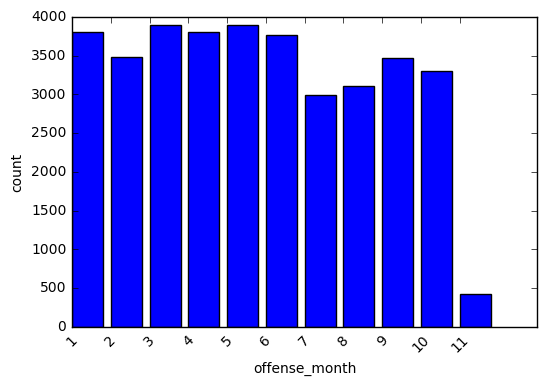

In [64]:
result = _
result.bar()
!echo 'Count of Committed Crimes occurring in Baton Rouge by month in 2016'

Now, let's look at the total count of crimes, and number of crimes in each category for 2016.  The categories that we developed are Personal Crimes, Property Crimes, Black Market Crimes and Other Minor Crimes.  Assault, Battery, Homicide, and Sexual Assault all are categorized as Personal Crimes.  Business Robberies, Individual Robberies, Non-Residential Burglaries, Residential Burglaries, Vehicle Burglaries, Criminal to Property, and Theft are considered Property Crimes.  Black Market crimes include Firearm, Narcotics, and Vice.  Finally, Other Minor crimes include Other, Juvenile and Nuisance.

In [65]:
%%sql
select offense_year, sum(file_number_cnt) as Count, 'Total Crimes' as Category
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_year
UNION ALL
select offense_year, sum(personal_crime_cnt) as Count,  'Personal Crimes' as Category
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_year
UNION ALL
select offense_year, sum(property_crime_cnt) as Count,  'Property Crimes' as Category
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_year
UNION ALL
select offense_year, sum(black_market_crime_cnt) as Count,  'Black Market Crimes' as Category
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_year
UNION ALL
select offense_year, sum(other_minor_crime_cnt) as Count,  'Other Minor Crimes' as Category
from br_crime_fact a join datetime_dim b on a.datetime_dim_id = b.datetime_dim_id 
group by offense_year
;

5 rows affected.


offense_year,count,category
2016,36715,Total Crimes
2016,6611,Personal Crimes
2016,20856,Property Crimes
2016,6954,Black Market Crimes
2016,2294,Other Minor Crimes


As seen in the output above and the chart below, most of the crimes committed were property crimes.  This would make sense because these tend to be more common crimes, like theft and burglary.  

Count of crime types occurring in Baton Rouge in 2016


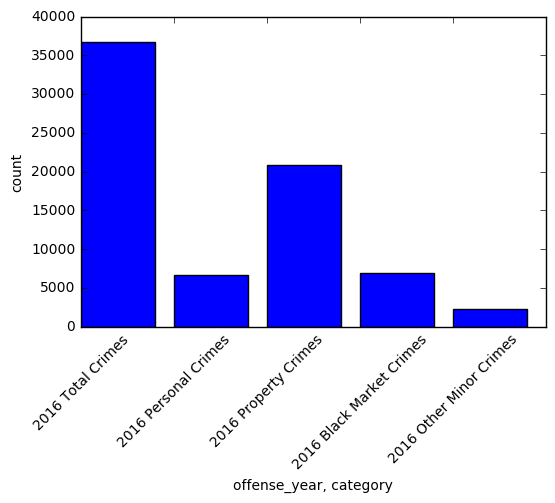

In [66]:
result = _
result.bar()
!echo 'Count of crime types occurring in Baton Rouge in 2016'

The code below counts the number of crimes, both committed and attempted, which occur by category at a district level.

In [67]:
%%sql
select count(*), crime_type, district
from br_crime_fact a join crime_dim b on a.crime_dim_id = b.crime_dim_id
                     join district_dim c on a.complete_district_dim_id = c.complete_district_dim_id
group by crime_type, district
order by crime_type, district
;

24 rows affected.


count,crime_type,district
2092,BLACK MARKET,1
1777,BLACK MARKET,2
1268,BLACK MARKET,3
1372,BLACK MARKET,4
32,BLACK MARKET,O
413,BLACK MARKET,None
737,OTHER MINOR,1
499,OTHER MINOR,2
512,OTHER MINOR,3
388,OTHER MINOR,4


District 2 seems to have a generally higher rate of crime for all of the categories.  

Count of crime types in each district


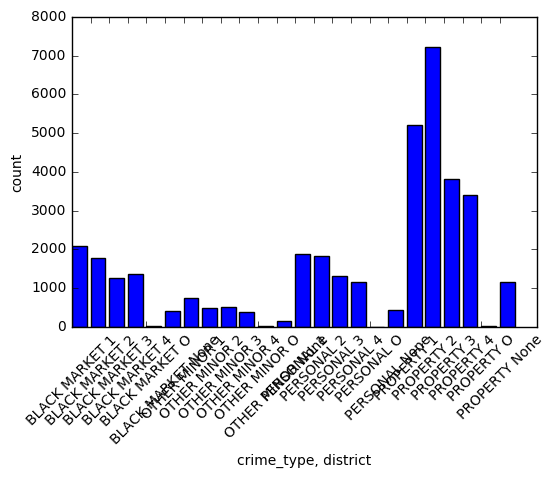

In [68]:
result = _
result.bar()
!echo 'Count of crime types in each district'

Below is a list of the top 10 zip codes for which crimes are committed and attempted.  As mentioned previously, the most frequent address in the datset is the address of the Baton Rouge Police Station.  The most frequent zip code for committed crimes corresponds with this address.  It would make sense that committed crimes occurred close to the police station, as most crimes associated with arrest may be recorded as occurring at the police station.  The attempted count does not follow the same pattern.  The most frequent zip code for attempted crimes is the second most frequent zip code for committed crimes. 

In [70]:
%%sql
select zip, sum(commited_cnt) as committed, sum(attempted_cnt) as attempted
from br_crime_fact a join location_dim b on a.location_dim_id = b.location_dim_id
where zip <> 'Null'
group by zip
order by sum(commited_cnt) desc
limit 10
;

10 rows affected.


zip,committed,attempted
70805,4619,75
70802,3544,81
70815,2164,45
70806,1814,69
70816,1695,36
70807,1563,33
70808,1314,24
70820,846,12
70811,354,7
70814,345,8


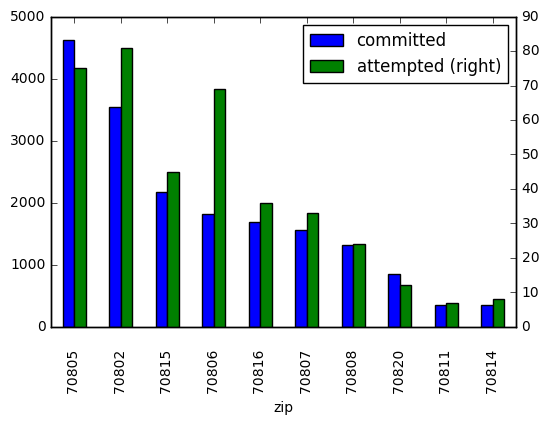

In [71]:
import matplotlib as plt
df = _.DataFrame()
df.plot(x='zip', secondary_y='attempted', kind = 'bar')

The following code shows the top 10 offenses occurring on a Friday.  The output is not incredibly surprising. There are some crimes associated with drugs an alcohol, as well as more common crimes such as theft.

In [81]:
%%sql
select offense_description, sum(a.commited_cnt) as committed
from br_crime_fact a join offense_dim b on a.offense_dim_id = b.offense_dim_id
                     join datetime_dim c on a.datetime_dim_id = c.datetime_dim_id
where offense_day_of_week_str = 'Friday'
group by offense_description
order by sum(commited_cnt) desc
limit 10
;

10 rows affected.


offense_description,committed
THEFT/MISD/CC,289
CRIM DAM TO PROP/SIMPLE/CC,271
BATT/SIMPLE/CC,237
THEFT OVER $200 ALL OTHER,191
BURG/AUTO OVER $200,180
POSS MARIJUANA/CC,171
D W I /CC,156
DRINKING IN PUBLIC/CC,146
THEFT/MISD/SHOPLIFTING/CC,141
PURCH/POSS ALC PERS UNDER 21/CC,133


Top 10 Offenses that occurs on a Friday


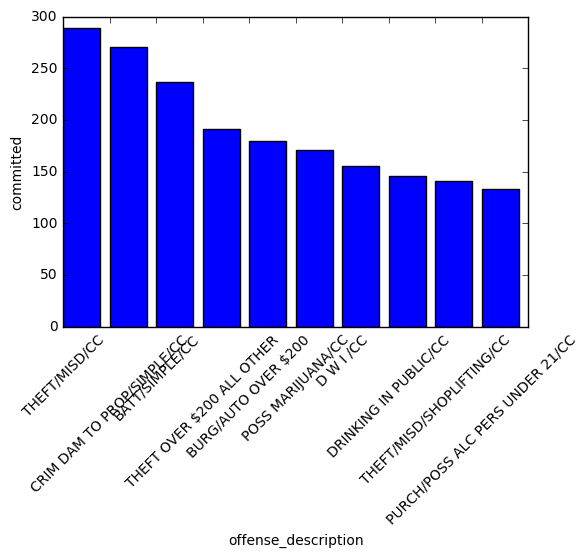

In [82]:
result = _
result.bar()
!echo 'Top 10 Offenses that occurs on a Friday'

We would thing that more crimes would intuitively occur during the weekend, when people are not in work, and may be exposed to substances that would impair judgement.  To prove this, the code below counts the crimes for each of the days of the week.  It seems that most crimes occur on Fridays and Saturdays, as we would expect.  

In [84]:
%%sql
select count(*), offense_day_of_week_str
from br_crime_fact a join datetime_dim c on a.datetime_dim_id = c.datetime_dim_id
group by offense_day_of_week_str
order by CASE offense_day_of_week_str
    WHEN 'Sunday' THEN 1
    WHEN 'Monday' THEN 2
    WHEN 'Tuesday' THEN 3
    WHEN 'Wednesday' THEN 4
    WHEN 'Thursday' THEN 5
    WHEN 'Friday' THEN 6
    ELSE 7
END
;

7 rows affected.


count,offense_day_of_week_str
4958,Sunday
4666,Monday
5100,Tuesday
5200,Wednesday
5500,Thursday
5641,Friday
5650,Saturday


Number of Crimes by Day of the Week in 2016


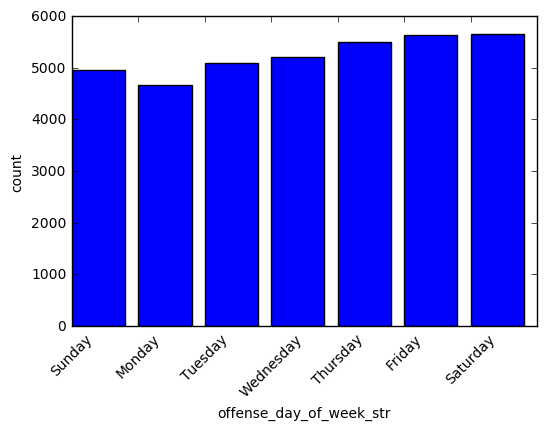

In [86]:
result = _
result.bar()
!echo 'Number of Crimes by Day of the Week in 2016'

From our analysis, it seems that the patterns of committed and reported crimes relates heavily to location of police station and whether the day of the week is a weekend night. It is more likely for police to be alert and aware of criminal activity occuring close to the station, and also for police to be more alert to criminal activity on a weekend night when this activity would be expected.  

This suggests that presence of police indicates a greater likelihood of crimes being reported/committed in a file report.  If we were to continue this analysis and gather more data, it would be interesting to have some more information on police presence.  An example of a column would be number of officers patrolling area within X miles.  With this information, we could account for the strong correlation between the amount of committed crimes committed and police presence.  This may uncover patterns in the data related to attempted and committed crimes that could be currently overshadowed.

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

###### What would it take to automate this process?    

One key thing to automating this process is to have a last updated timestamp in all the tables. Thus, we would only need to check the last updated timestamp for new records. For instance, if the last updated timestamp has changed for the unique key, then we could do a comparison to see what information change and update accordingly. Additionally, it would also identify any new records. However, in order for all this be automated, we would need to define a primary key. Currently, we are defining the unique key after the fact, however, in order to automate this process, we would need to have the primary key defined. We would need to write a stored procedure to check on the last update timestamp and primary key and then insert/update accordingly. 

###### How often would you need to update the data?

Ideally, it would be nice to have the data updated in real time. However, this is usually not feasible or practical. So, a daily update should be sufficient. Depending on the industry, it could range from couple hundreds of new records to a couple million records each day. At NSF, we typically see a couple thousands new records each day, which takes roughly 2-3 hours to process. Our cut off to process new data is 11:59 pm that day and usually run the ETL process around 2am, so that new data can be brought into the data warehouse before the start of the new day, which in my case is 6 am. 

###### Could you easily automate any data cleaning steps?

We could easily automate any data cleaning steps by creating a stored procedure to update any nulls or update the dimension tables if there are new categorization for crime, offense, and location. We had nulls in our address, street number, complete district and many others fields. A stored procedure to update the nulls would automate the data cleaning process.

###### What checks would you need to put in place to ensure quality? Would humans need to be involved, or could you automate it all?

In this particular case, humans should be involved, however, only very minimally. Since the Baton Rouge crime data does not have a unique key (the same file number can have multiple crimes and offenses associated to it), we needed to create a unique key. With that said, we would need to have a check in place to capture duplicate records. Perhaps create a stored procedure to trigger a warning and to store the potential duplicate in a separate table, which would later be validated by a user before we load the data into fact and dimension tables.